<a href="https://colab.research.google.com/github/shristi198-crypto/Loan_Approval/blob/main/Loan_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_sanction_test.csv to loan_sanction_test.csv


**IMPORTING Necessary Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as py

**Data EXPLORATION
LOAD DATA**

In [4]:
data=pd.read_csv('/content/loan_sanction_test.csv')

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [9]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1.0,Rural


In [10]:
data.count()

,0
Loan_ID,367
Gender,356
Married,367
Dependents,357
Education,367
Self_Employed,344
ApplicantIncome,367
CoapplicantIncome,367
LoanAmount,362
Loan_Amount_Term,361


## **Checking Missing Values**

In [11]:
data.shape

(367, 12)

In [12]:
data.isnull().sum()/len(data)*100

,0
Loan_ID,0.000000
Gender,2.997275
Married,0.000000
Dependents,2.724796
Education,0.000000
Self_Employed,6.267030
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,1.362398
Loan_Amount_Term,1.634877


In [13]:
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])

In [14]:
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].mode()[0])

In [15]:
data["Dependents"]=data["Dependents"].replace('3+','3').astype(int)

In [16]:
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [17]:
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].mean())

In [18]:
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].mean())

In [19]:
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].mean())

In [20]:
data["Credit_History"]=data["Credit_History"].astype(int)

In [21]:
data.isnull().sum()/len(data)*100

,0
Loan_ID,0.0
Gender,0.0
Married,0.0
Dependents,0.0
Education,0.0
Self_Employed,0.0
ApplicantIncome,0.0
CoapplicantIncome,0.0
LoanAmount,0.0
Loan_Amount_Term,0.0


In [22]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1,Urban


In [24]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
362,LP002971,Male,Yes,3,Not Graduate,Yes,4009,1777,113.0,360.0,1,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,0,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1,Rural
366,LP002989,Male,No,0,Graduate,Yes,9200,0,98.0,180.0,1,Rural


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    int64  
 11  Property_Area      367 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 34.5+ KB


**Summarize basic statistic for the numeric columns**

In [26]:
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.806540,4805.599455,1569.577657,136.132597,342.537396,0.760218
std,1.065177,4910.685399,2334.232099,60.946040,64.620366,0.427533
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [27]:
print("Detailed Statistics for Numeric Columns:")
numeric_col=["ApplicantIncome",'CoapplicantIncome','LoanAmount',"Loan_Amount_Term"]
for col in numeric_col:
  print(f"\nColumn: for {col}")
  print(f"Mean: {data[col].mean():.2f}")
  print(f"Median: {data[col].median():.2f}")
  print(f"Standard Deviation: {data[col].std():.2f}")
  print(f"Minimum: {data[col].min()}")
  print(f"Maximum: {data[col].max()}")

Detailed Statistics for Numeric Columns:

Column: for ApplicantIncome
Mean: 4805.60
Median: 3786.00
Standard Deviation: 4910.69
Minimum: 0
Maximum: 72529

Column: for CoapplicantIncome
Mean: 1569.58
Median: 1025.00
Standard Deviation: 2334.23
Minimum: 0
Maximum: 24000

Column: for LoanAmount
Mean: 136.13
Median: 126.00
Standard Deviation: 60.95
Minimum: 28.0
Maximum: 550.0

Column: for Loan_Amount_Term
Mean: 342.54
Median: 360.00
Standard Deviation: 64.62
Minimum: 6.0
Maximum: 480.0


# **Data Visualization**

### Univariate Analysis

Explore the distribution of numeric columns using the following visualization
Histrogram: Plots the frequency distribution of key numeric variables:

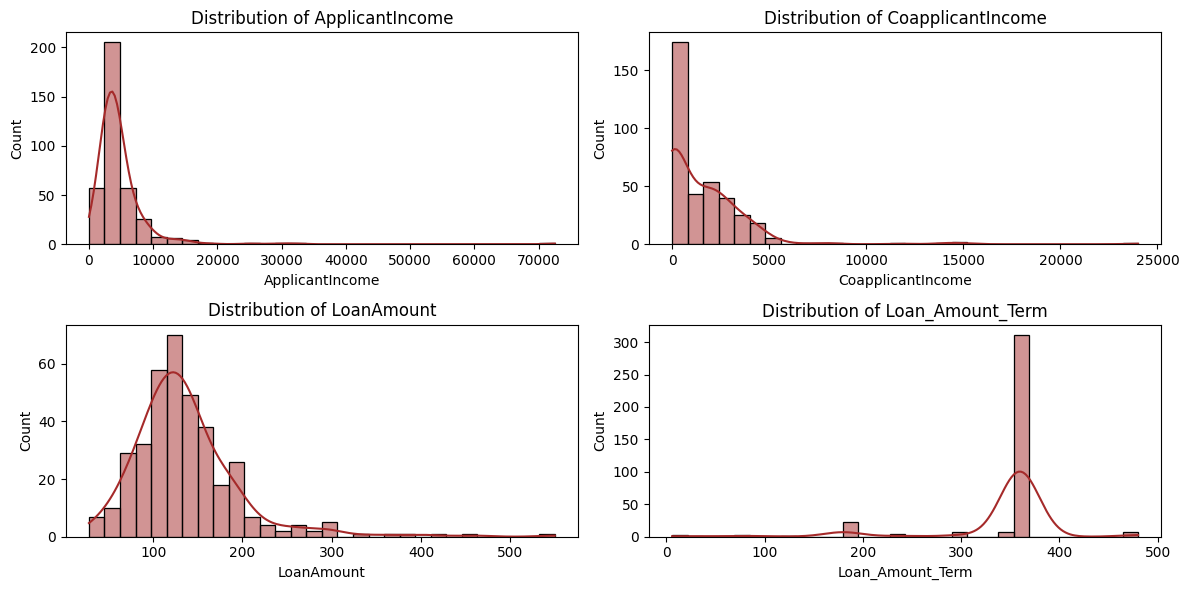

In [31]:
numeric_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(12,6))
for i, col in enumerate(numeric_col,1):
  plt.subplot(2,2,i)
  sns.histplot(data[col],bins=30, kde=True, color='brown')
  plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Boxplot: Identify potential outliners and visualize the spread of data**

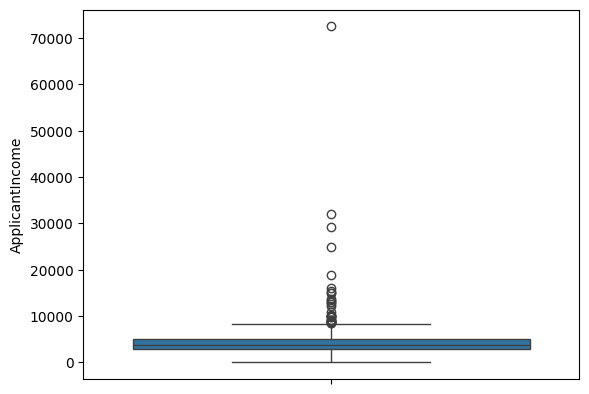

In [29]:
q1=data["ApplicantIncome"].quantile(0.25)
q3=data["ApplicantIncome"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr # Corrected upper bound calculation
outliers=data[(data['ApplicantIncome']<lower_bound) | (data['ApplicantIncome']>upper_bound)] # Corrected outlier condition
print(f"Number of outliers in ApplicantIncome: {len(outliers)}")
data["ApplicantIncome"]=np.where(data["ApplicantIncome"]<lower_bound, lower_bound, data["ApplicantIncome"]) # Corrected np.where usage
data["ApplicantIncome"]=np.where(data["ApplicantIncome"]>upper_bound, upper_bound, data["ApplicantIncome"]) # Corrected np.where usagesns.boxplot(data["ApplicantIncome"])
plt.show()

In [32]:
q1=data["ApplicantIncome"].quantile(0.25)
q3=data["ApplicantIncome"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr # Corrected upper bound calculation
outliers=data[(data['ApplicantIncome']<lower_bound) | (data['ApplicantIncome']>upper_bound)] # Corrected outlier condition
print(f"Number of outliers in ApplicantIncome: {len(outliers)}")
data["ApplicantIncome"]=np.where(data["ApplicantIncome"]<lower_bound, lower_bound, data["ApplicantIncome"]) # Corrected np.where usage
data["ApplicantIncome"]=np.where(data["ApplicantIncome"]>upper_bound, upper_bound, data["ApplicantIncome"]) # Corrected np.where usage

Number of outliers in ApplicantIncome: 32


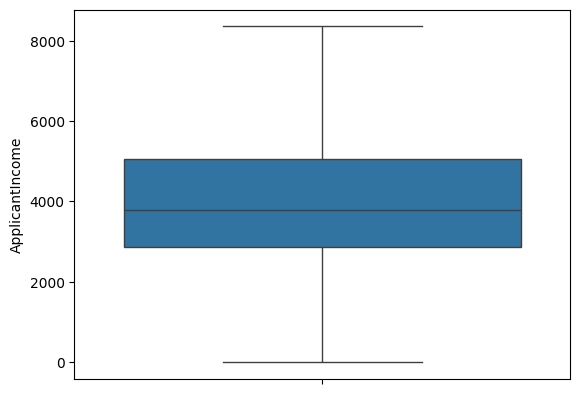

In [33]:
sns.boxplot(data["ApplicantIncome"])
plt.show()

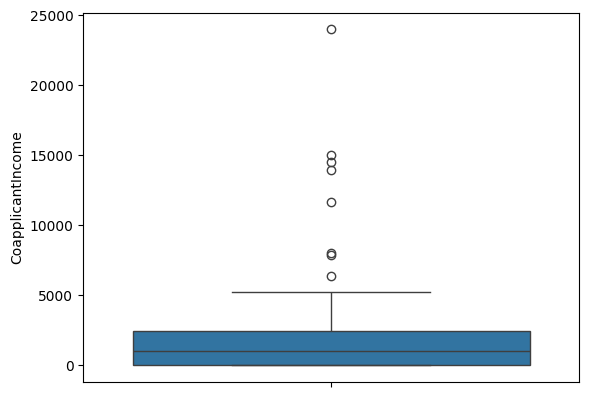

In [34]:
sns.boxplot(data["CoapplicantIncome"])
plt.show()

In [35]:
q1=data["CoapplicantIncome"].quantile(0.25)
q3=data["CoapplicantIncome"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr # Corrected upper bound calculation
outliers=data[(data['CoapplicantIncome']<lower_bound) | (data['CoapplicantIncome']>upper_bound)] # Corrected outlier condition
print(f"Number of outliers in CoapplicantIncome: {len(outliers)}")
data["CoapplicantIncome"]=np.where(data["CoapplicantIncome"]<lower_bound, lower_bound, data["CoapplicantIncome"]) # Corrected np.where usage
data["CoapplicantIncome"]=np.where(data["CoapplicantIncome"]>upper_bound, upper_bound, data["CoapplicantIncome"]) # Corrected np.where usage

Number of outliers in CoapplicantIncome: 8


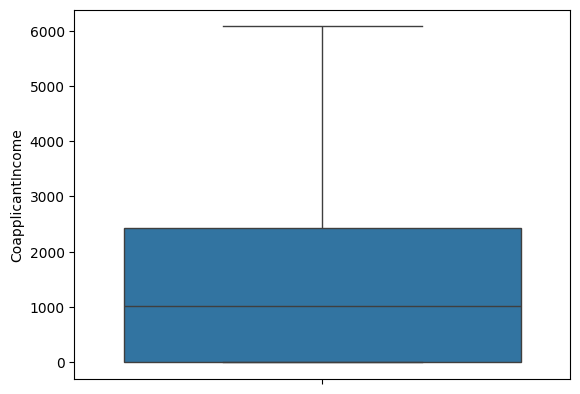

In [36]:
sns.boxplot(data["CoapplicantIncome"])
plt.show()

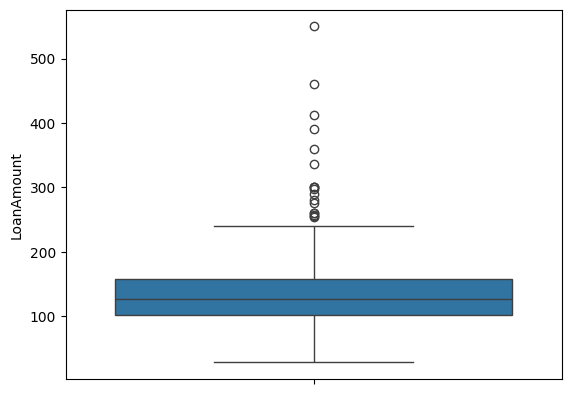

In [37]:
sns.boxplot(data["LoanAmount"])
plt.show()

In [38]:
q1=data["LoanAmount"].quantile(0.25)
q3=data["LoanAmount"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr # Corrected upper bound calculation
outliers=data[(data['LoanAmount']<lower_bound) | (data['LoanAmount']>upper_bound)] # Corrected outlier condition
print(f"Number of outliers in LoanAmount: {len(outliers)}")
data["LoanAmount"]=np.where(data["LoanAmount"]<lower_bound, lower_bound, data["LoanAmount"]) # Corrected np.where usage
data["LoanAmount"]=np.where(data["LoanAmount"]>upper_bound, upper_bound, data["LoanAmount"]) # Corrected np.where usage

Number of outliers in LoanAmount: 18


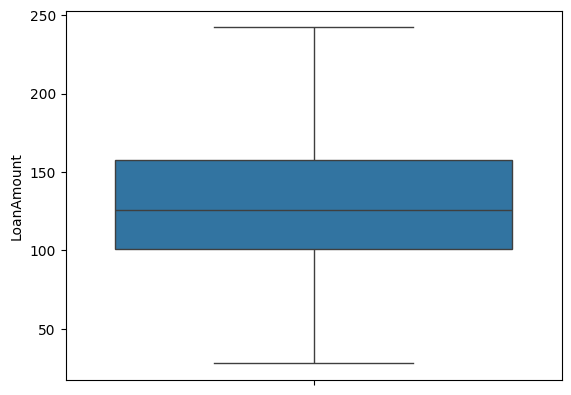

In [39]:
sns.boxplot(data['LoanAmount'])
plt.show()

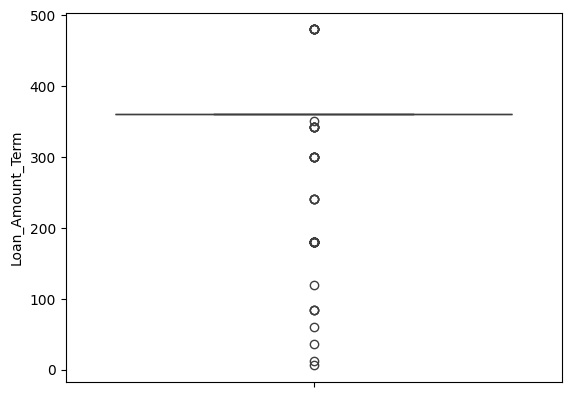

In [40]:
sns.boxplot(data["Loan_Amount_Term"])
plt.show()

In [41]:
q1=data["Loan_Amount_Term"].quantile(0.25)
q3=data["Loan_Amount_Term"].quantile(0.75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr # Corrected upper bound calculation
outliers=data[(data['Loan_Amount_Term']<lower_bound) | (data['Loan_Amount_Term']>upper_bound)] # Corrected outlier condition
print(f"Number of outliers in Loan_Amount_Term: {len(outliers)}")
data["Loan_Amount_Term"]=np.where(data["Loan_Amount_Term"]<lower_bound, lower_bound, data["Loan_Amount_Term"]) # Corrected np.where usage
data["Loan_Amount_Term"]=np.where(data["Loan_Amount_Term"]>upper_bound, upper_bound, data["Loan_Amount_Term"]) # Corrected np.where usage

Number of outliers in Loan_Amount_Term: 56


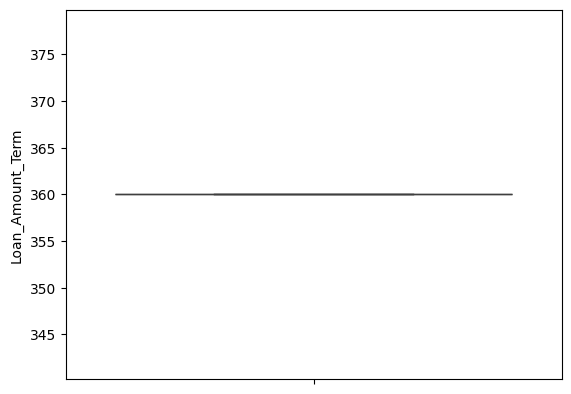

In [42]:
sns.boxplot(data["Loan_Amount_Term"])
plt.show()

### **Analyze Categorical variables by creating the following plots:**

**Bar Charts :Visualize the frequency distribution of Categorical variable**

/tmp/ipython-input-4098539487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=data, palette="bwr")


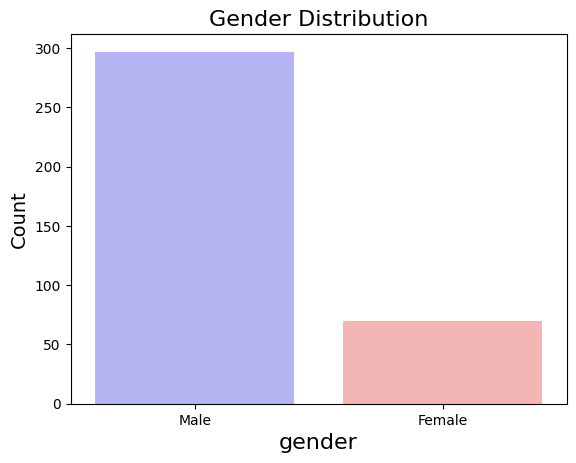

In [43]:
cat_cols=["Gender","Married","Dependents","Education","Self_Employed","Property_Area"]
sns.countplot(x="Gender", data=data, palette="bwr")
plt.title(f'Gender Distribution',fontsize=16)
plt.xlabel(f'gender',fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

/tmp/ipython-input-240738802.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=data, palette="Set3")


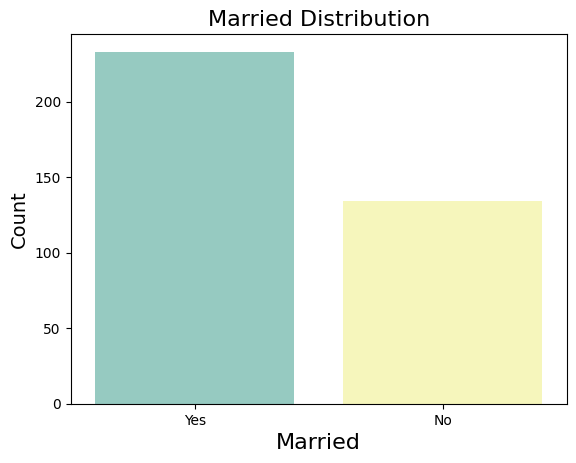

In [44]:
sns.countplot(x="Married", data=data, palette="Set3")
plt.title(f'Married Distribution',fontsize=16)
plt.xlabel(f'Married',fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

/tmp/ipython-input-737541172.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=data, palette="viridis")


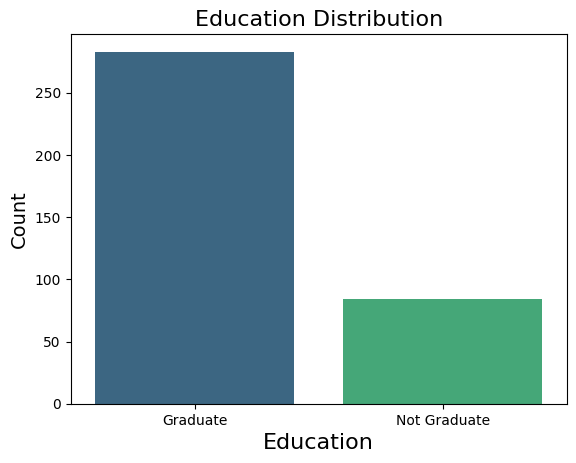

In [45]:
sns.countplot(x="Education", data=data, palette="viridis")
plt.title(f'Education Distribution',fontsize=16)
plt.xlabel(f'Education',fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

/tmp/ipython-input-2653443546.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=data, palette="Set1")


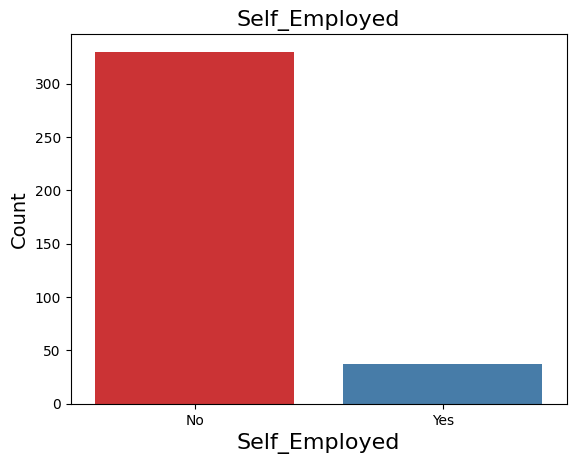

In [46]:
sns.countplot(x="Self_Employed", data=data, palette="Set1")
plt.title(f'Self_Employed',fontsize=16)
plt.xlabel(f'Self_Employed',fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

/tmp/ipython-input-2388926660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=data, palette="plasma")


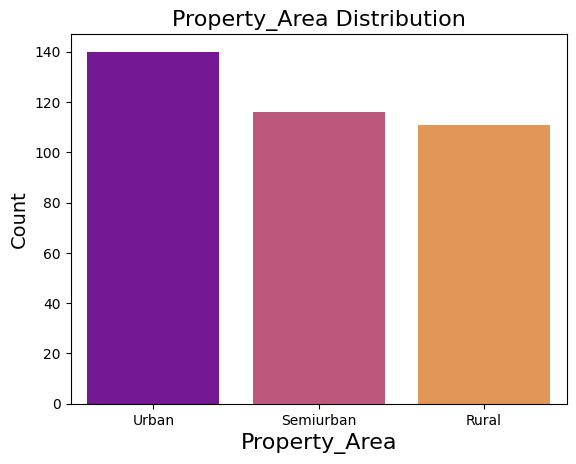

In [47]:
sns.countplot(x="Property_Area", data=data, palette="plasma")
plt.title(f'Property_Area Distribution',fontsize=16)
plt.xlabel(f'Property_Area',fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.show()

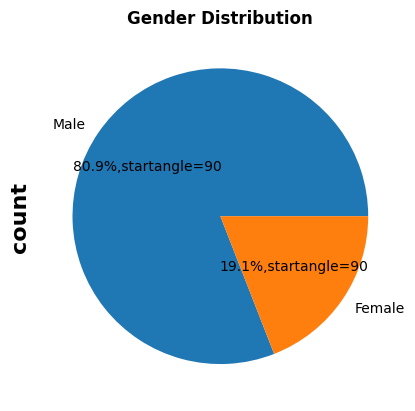

In [48]:
data["Gender"].value_counts().plot.pie(autopct="%1.1f%%,startangle=90",color="plasma")
plt.title("Gender Distribution", fontsize=12, fontweight="bold")
plt.ylabel("count",fontsize=16, fontweight="bold")
plt.show()

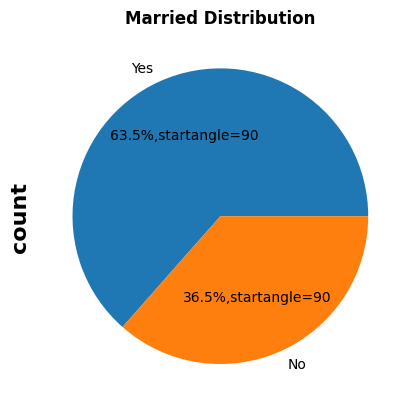

In [49]:
data["Married"].value_counts().plot.pie(autopct="%1.1f%%,startangle=90",color="viridis")
plt.title("Married Distribution", fontsize=12, fontweight="bold")
plt.ylabel("count",fontsize=16, fontweight="bold")
plt.show()

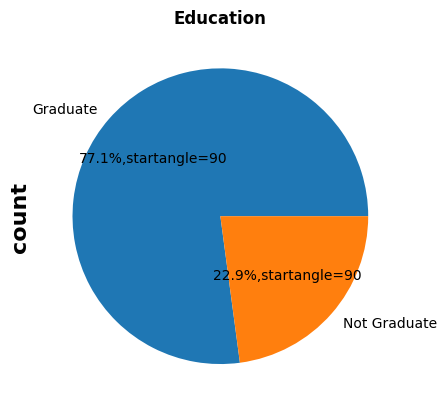

In [50]:
data["Education"].value_counts().plot.pie(autopct="%1.1f%%,startangle=90",color="bwr")
plt.title("Education", fontsize=12, fontweight="bold")
plt.ylabel("count",fontsize=16, fontweight="bold")
plt.show()

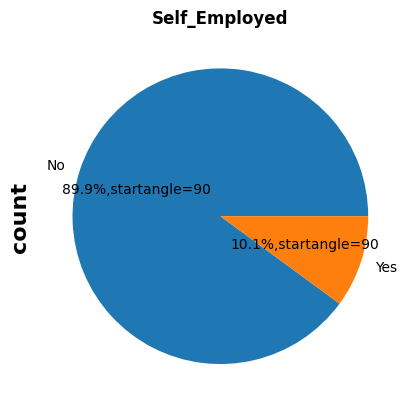

In [51]:
data["Self_Employed"].value_counts().plot.pie(autopct="%1.1f%%,startangle=90",color="Set3")
plt.title("Self_Employed", fontsize=12, fontweight="bold")
plt.ylabel("count",fontsize=16, fontweight="bold")
plt.show()

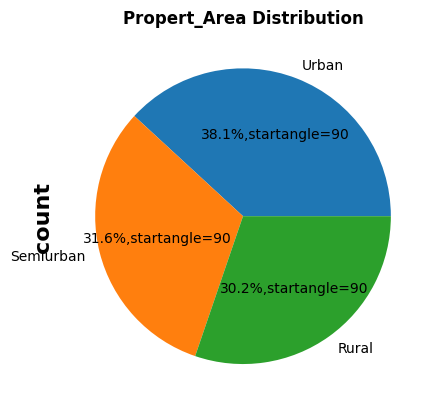

In [52]:
data["Property_Area"].value_counts().plot.pie(autopct="%1.1f%%,startangle=90",color="Set3")
plt.title("Propert_Area Distribution", fontsize=12, fontweight="bold")
plt.ylabel("count",fontsize=16, fontweight="bold")
plt.show()

**Bivariate Analysis**

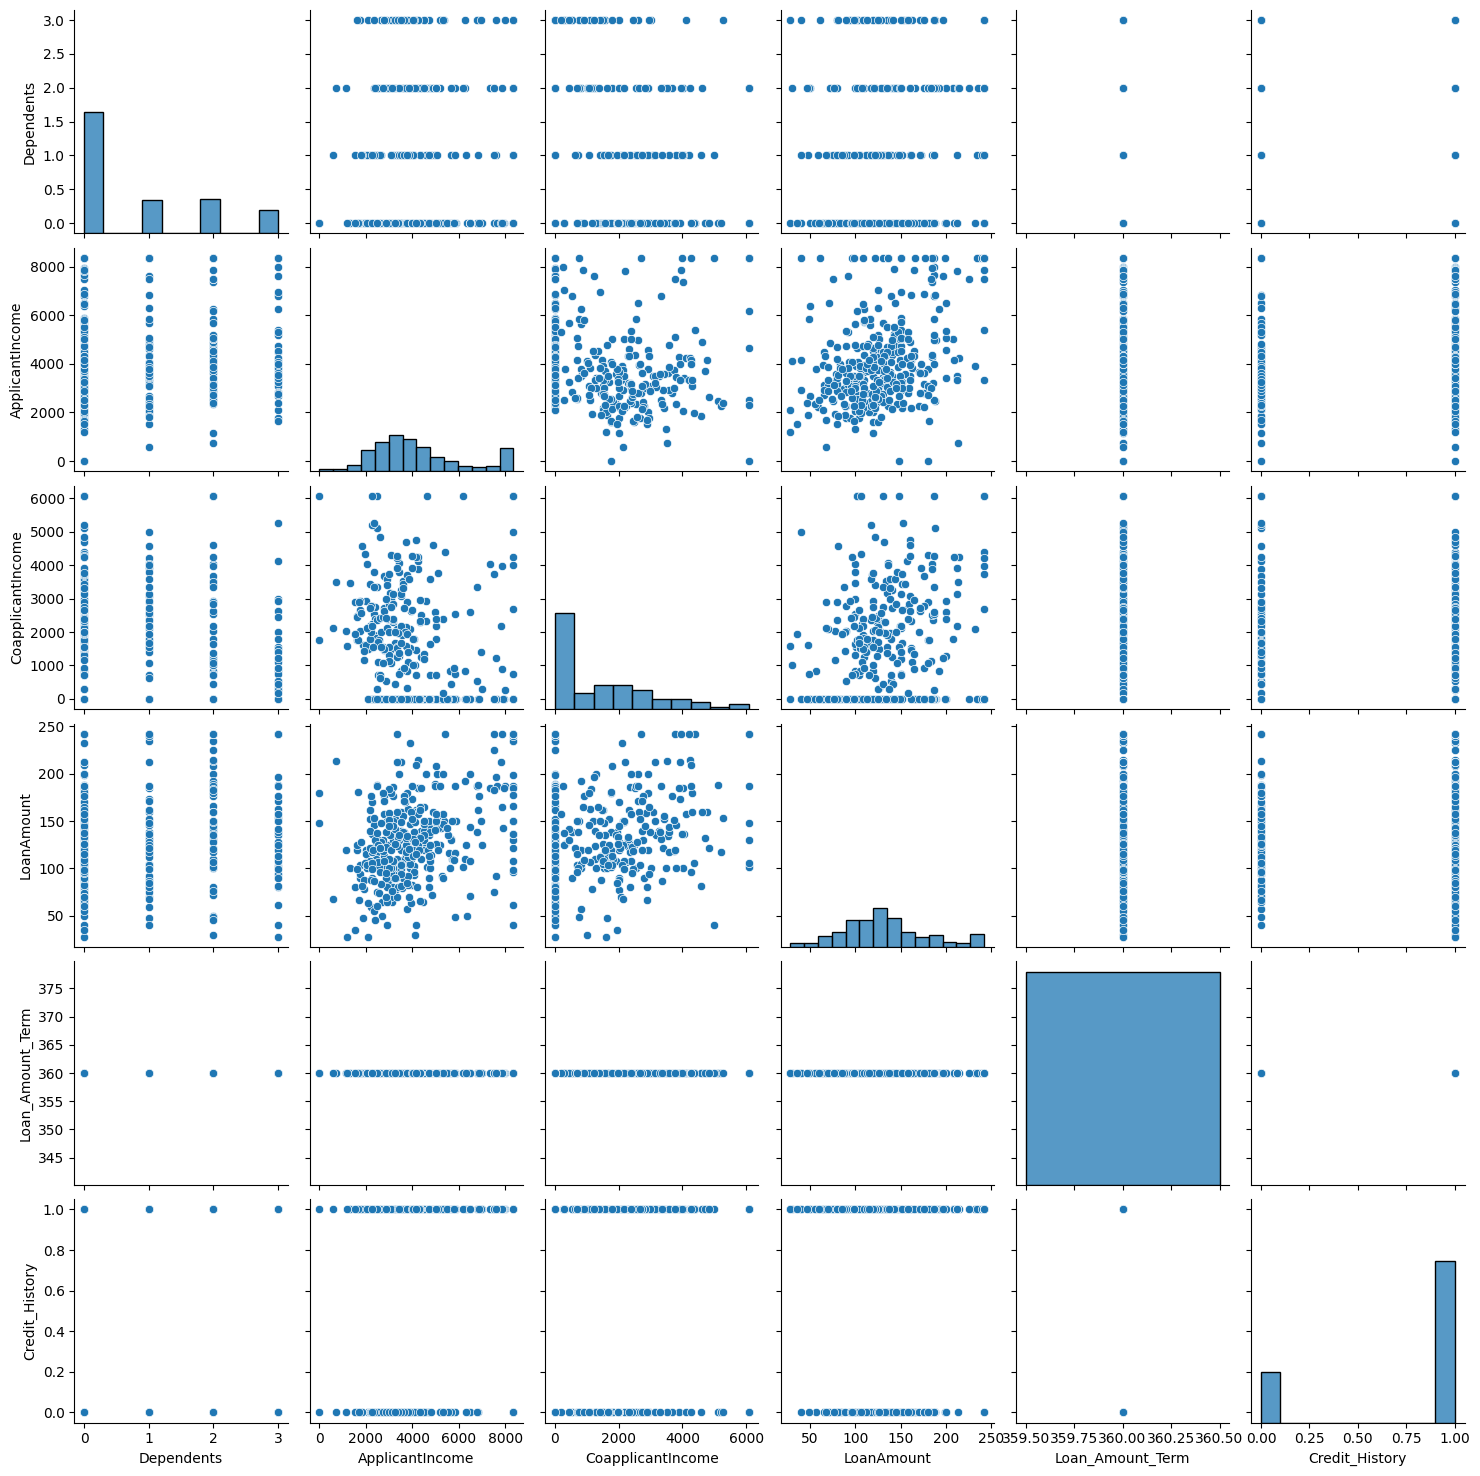

In [53]:
sns.pairplot(data)
plt.show()

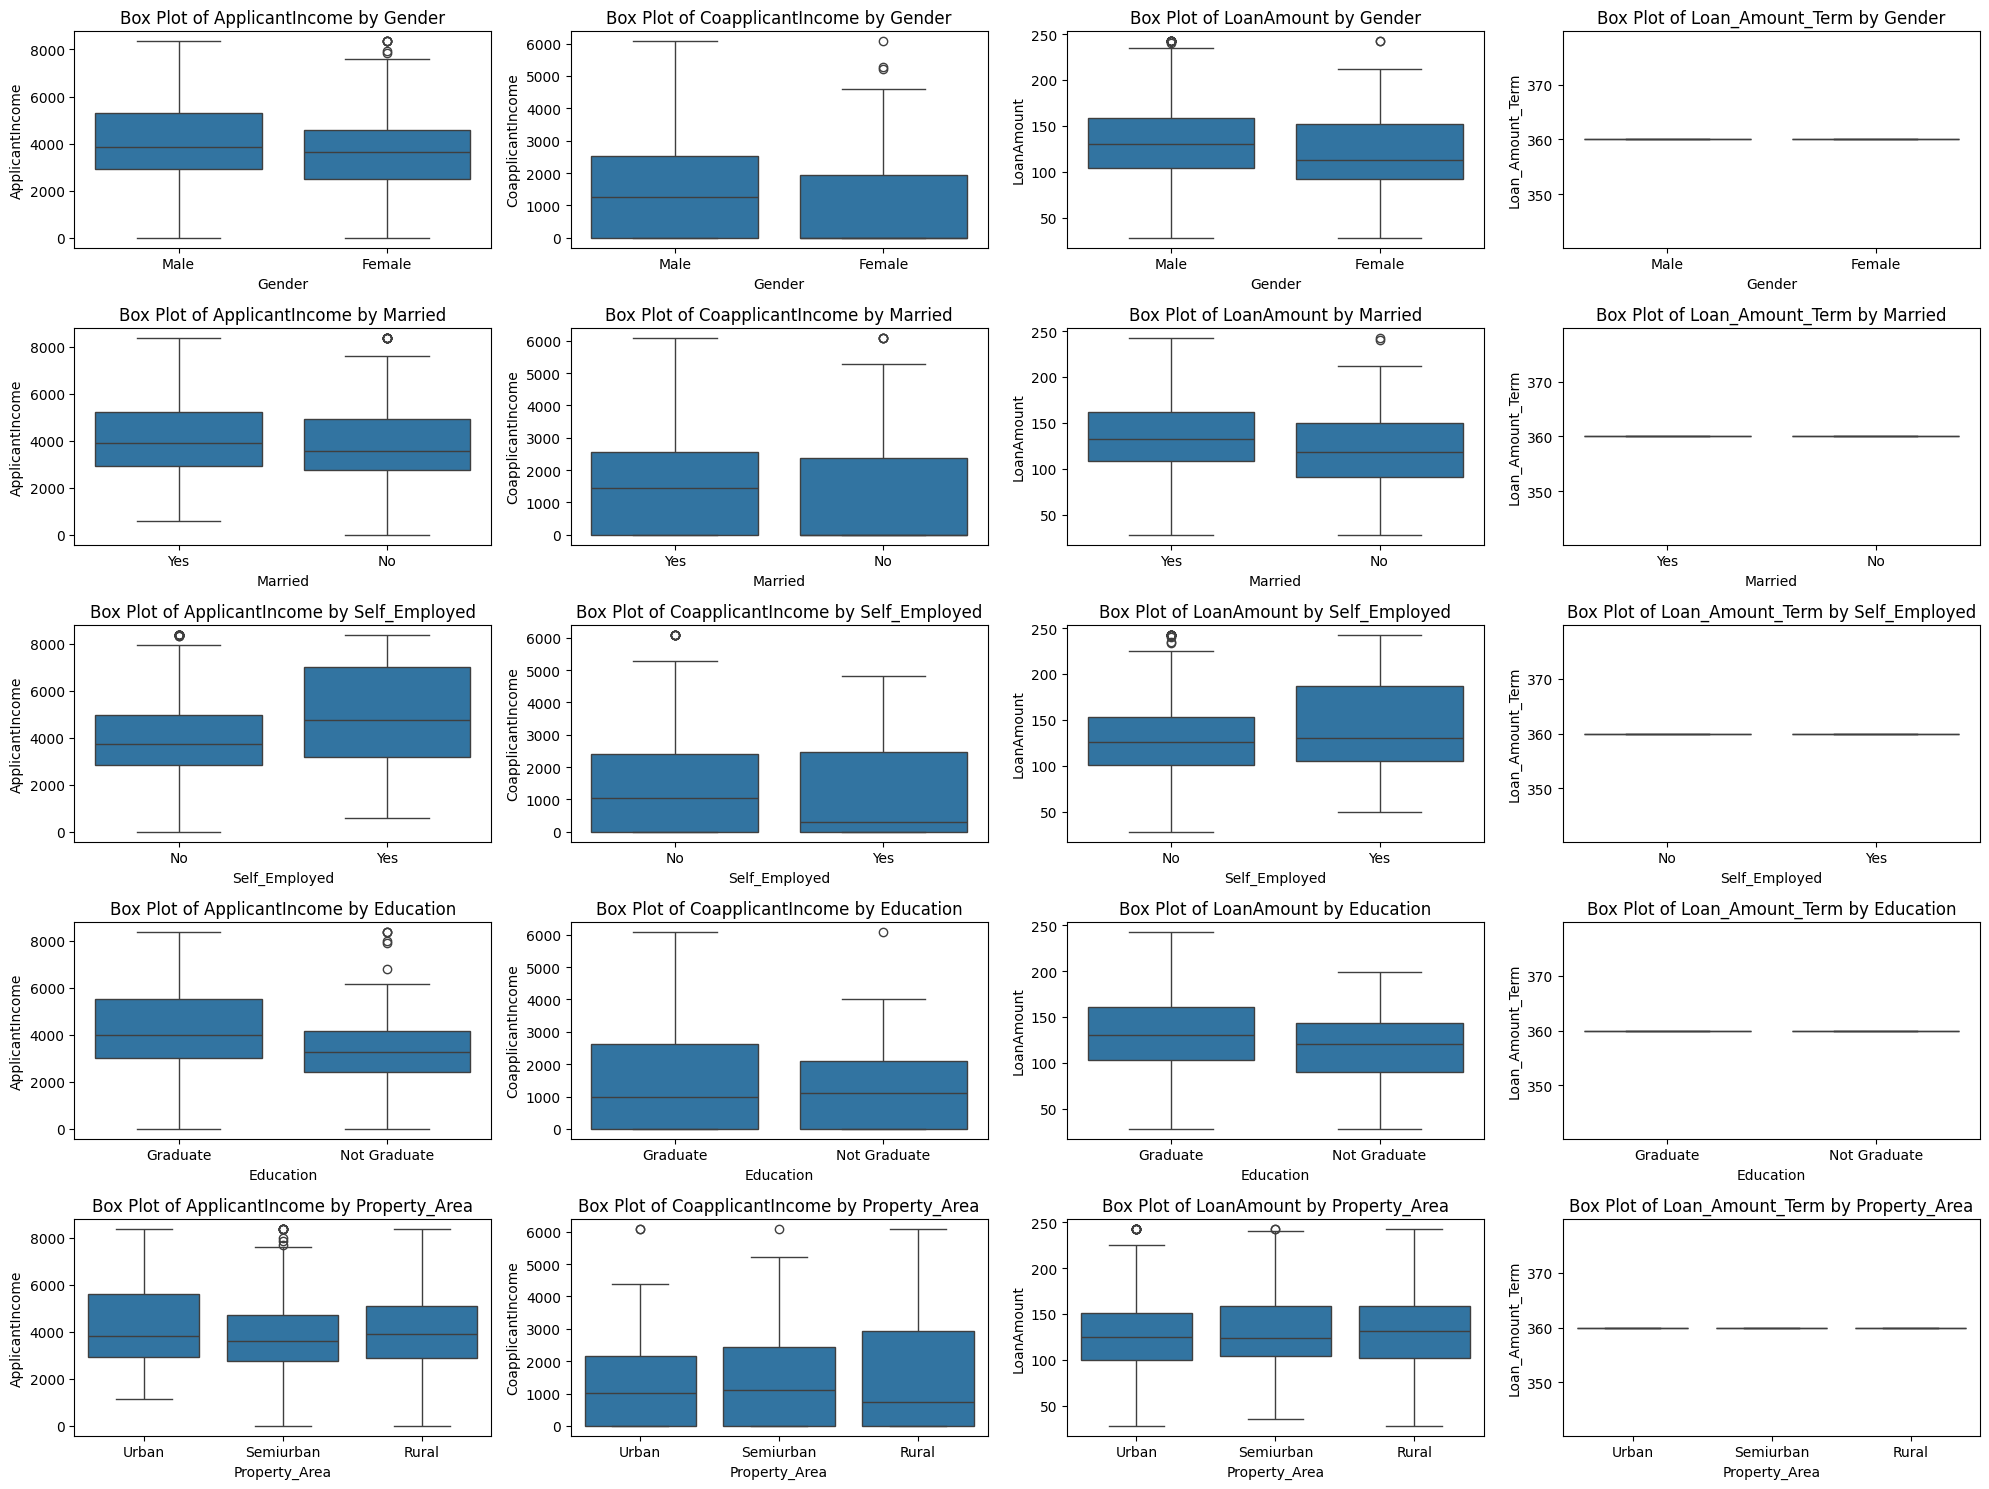

In [54]:
plt.figure(figsize=(20,15))
cat_cols=["Gender","Married","Self_Employed",'Education',"Property_Area"]
num_cols=["ApplicantIncome",'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i, cat_col in enumerate(cat_cols):
  for j,num_col in enumerate(num_cols):
    plt.subplot(len(cat_cols),len(num_cols),i*len(num_cols)+j+1)
    sns.boxplot(x=cat_col,y=num_col,data=data)
    plt.title(f'Box Plot of {num_col} by {cat_col}')
plt.tight_layout()
plt.show()

**Multivariate ANALYSIS **
Perform a correlation analysis to identify relationship between numeric variables. Visualise Correlation using a heatmap.

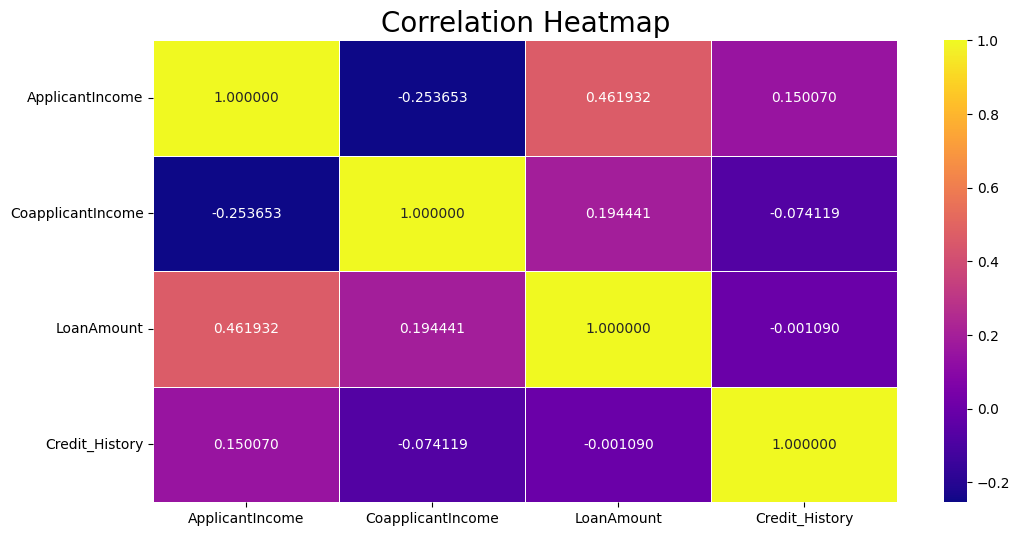

In [57]:
num_cols=['ApplicantIncome',"CoapplicantIncome","LoanAmount",'Credit_History']
corr =data[num_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True, cmap="plasma",fmt="2f",linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

Create a Stacke Bar Chart to show the distribution of categorical variables across mutiple categories.**bold text**

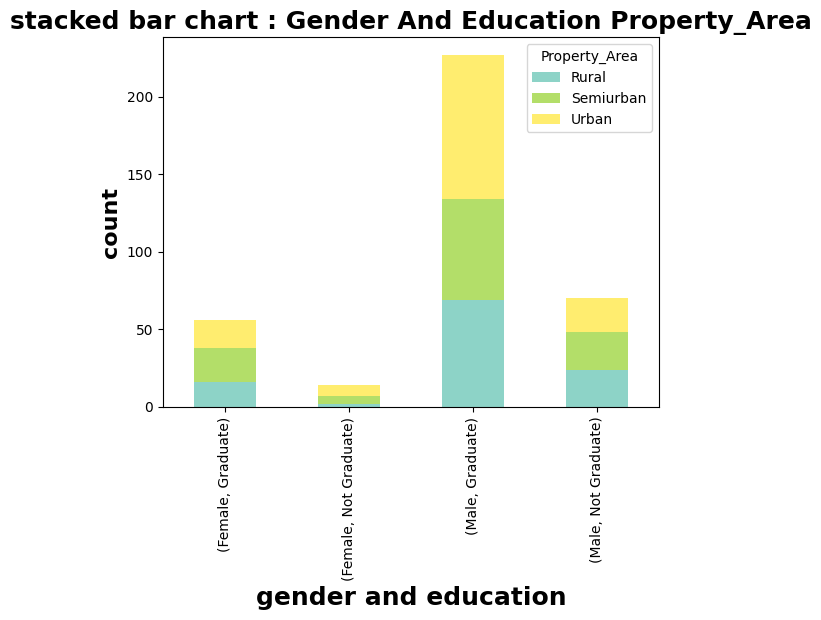

In [59]:
crosstab = pd.crosstab([data['Gender'],data["Education"]],data["Property_Area"])
crosstab.plot(kind="bar" , stacked=True, colormap="Set3")
plt.title("stacked bar chart : Gender And Education Property_Area", fontsize =18,fontweight= "bold")
plt.xlabel('gender and education', fontsize=18, fontweight="bold")
plt.ylabel("count",fontsize=16, fontweight ="bold")
plt.show()

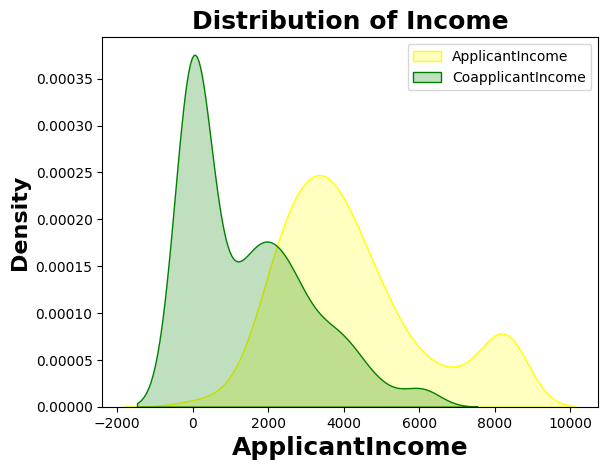

In [60]:
sns.kdeplot(data["ApplicantIncome"], fill=True, color="yellow", label="ApplicantIncome")
sns.kdeplot(data['CoapplicantIncome'], fill=True, color="green", label="CoapplicantIncome")
plt.title("Distribution of Income", fontsize =18,fontweight= "bold")
plt.xlabel('ApplicantIncome', fontsize=18, fontweight="bold")
plt.ylabel("Density",fontsize=16, fontweight ="bold")
plt.legend()
plt.show()

/tmp/ipython-input-330721973.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Self_Employed' , y="LoanAmount", data=data, palette = "dark")


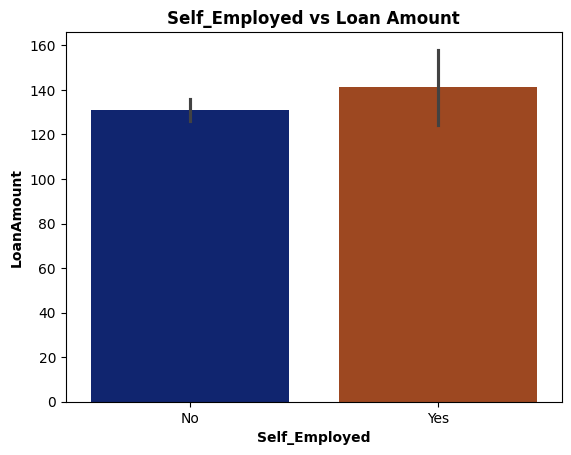

In [61]:
sns.barplot(x='Self_Employed' , y="LoanAmount", data=data, palette = "dark")
plt.title('Self_Employed vs Loan Amount', fontweight="bold")
plt.xlabel("Self_Employed", fontweight ="bold")
plt.ylabel("LoanAmount",fontweight ="bold")
plt.show()

/tmp/ipython-input-2077790890.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Property_Area",y="LoanAmount", data=data, palette="plasma")


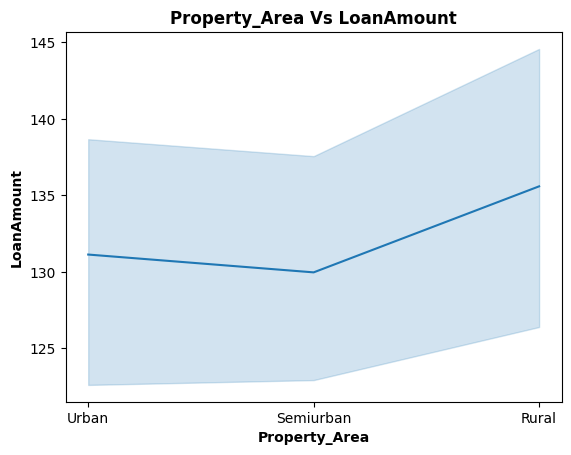

In [63]:
sns.lineplot(x="Property_Area",y="LoanAmount", data=data, palette="plasma")
plt.title("Property_Area Vs LoanAmount", fontweight= "bold")
plt.xlabel("Property_Area", fontweight ="bold")
plt.ylabel("LoanAmount",fontweight ="bold")
plt.show()

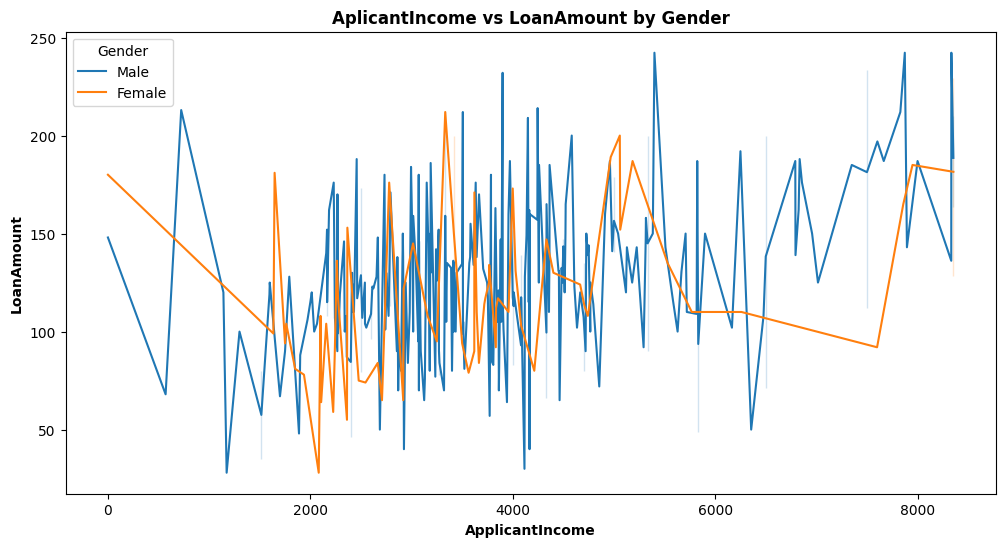

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(x="ApplicantIncome", y='LoanAmount', hue="Gender", data=data)
plt.title('AplicantIncome vs LoanAmount by Gender',fontweight= "bold")
plt.xlabel("ApplicantIncome", fontweight ="bold")
plt.ylabel("LoanAmount",fontweight ="bold")
plt.show()

/tmp/ipython-input-297235101.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Education", y="Credit_History", data=data, palette="muted")


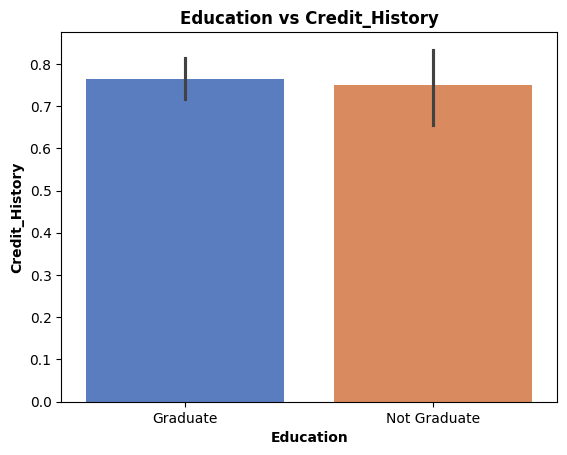

In [68]:
sns.barplot(x="Education", y="Credit_History", data=data, palette="muted")
plt.title ('Education vs Credit_History',fontweight= "bold")
plt.xlabel("Education", fontweight ="bold")
plt.ylabel("Credit_History",fontweight ="bold")
plt.show()

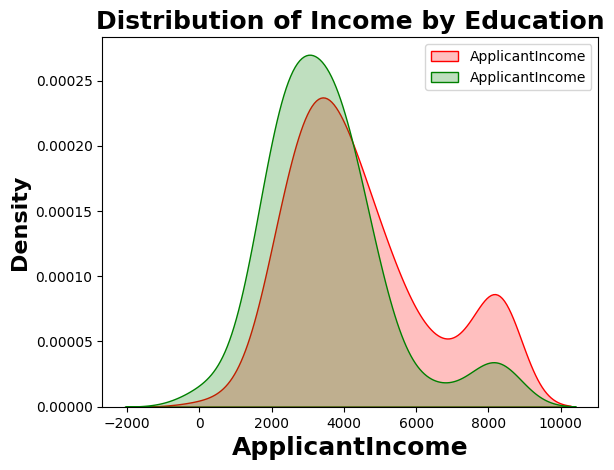

In [74]:
sns.kdeplot(data[data["Education"] == 'Graduate']["ApplicantIncome"],fill=True, color="red", label="ApplicantIncome")
sns.kdeplot(data[data["Education"] == 'Not Graduate']["ApplicantIncome"],fill=True, color="green", label="ApplicantIncome")
plt.title("Distribution of Income by Education", fontsize =18,fontweight= "bold")
plt.xlabel('ApplicantIncome', fontsize=18, fontweight="bold")
plt.ylabel("Density",fontsize=16, fontweight ="bold")
plt.legend()
plt.show()

/tmp/ipython-input-2030511761.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dependents' , y="LoanAmount", data=data, palette = "tab20")


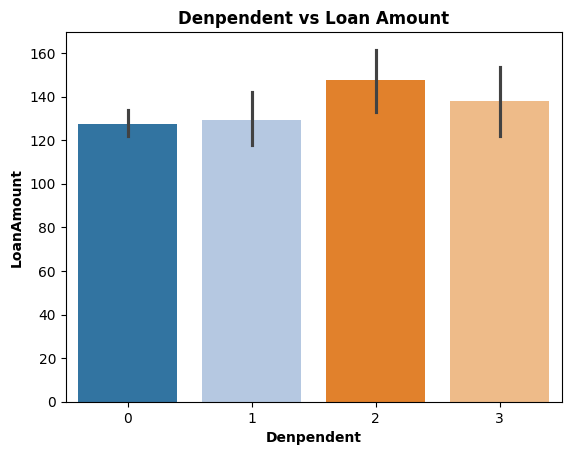

In [81]:
sns.barplot(x='Dependents' , y="LoanAmount", data=data, palette = "tab20")
plt.title('Denpendent vs Loan Amount', fontweight="bold")
plt.xlabel("Denpendent", fontweight ="bold")
plt.ylabel("LoanAmount",fontweight ="bold")
plt.show()

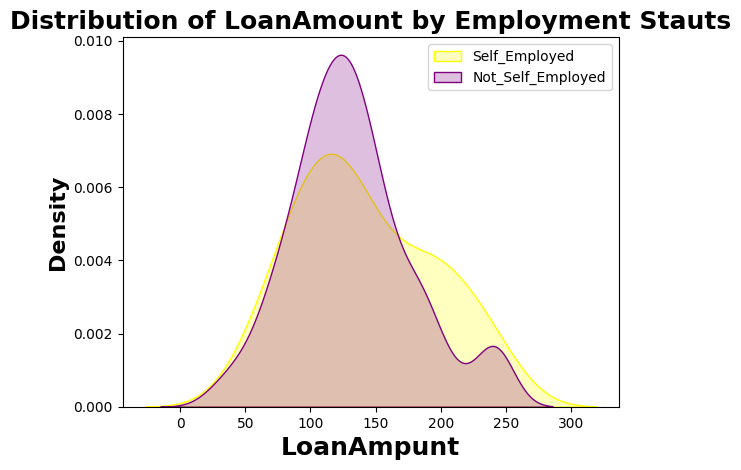

In [84]:
sns.kdeplot(data[data["Self_Employed"] == 'Yes']["LoanAmount"],fill=True, color="yellow", label="Self_Employed")
sns.kdeplot(data[data["Self_Employed"] == 'No' ]["LoanAmount"],fill=True, color="purple", label="Not_Self_Employed")
plt.title("Distribution of LoanAmount by Employment Stauts", fontsize =18,fontweight= "bold")
plt.xlabel('LoanAmpunt', fontsize=18, fontweight="bold")
plt.ylabel("Density",fontsize=16, fontweight ="bold")
plt.legend()
plt.show()